In [1]:
import os
import sys
import glob
import datetime
from functools import reduce

import numpy as np
import pandas as pd

#import plotly

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
pulsar_name = '0809+74'
tab_path = 'C:\\astrophysics\\'
plus_path = 'Work\\gp_new\\'
gp_table_pulsar = pd.read_table(tab_path + plus_path + pulsar_name + '_gp_bas_300.0_sigma.csv', sep='\t')
session_pulsar = pd.read_table(tab_path + plus_path + pulsar_name + '_obs_bas_300.0_sigma.csv', sep='\t')

In [3]:
gp_table_pulsar['Time_series'] = pd.to_datetime(gp_table_pulsar['Date'], format='%d.%m.%Y', errors='ignore')
session_pulsar['Time_series'] = pd.to_datetime(session_pulsar['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_pulsar = gp_table_pulsar.set_index('Time_series')
session_pulsar = session_pulsar.set_index('Time_series')

In [4]:
gp_table_pulsar.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",File name,"Count of GP, u",Num pulse,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot
Time_series,,,,,,,,,,,,,,,,
2014-01-02,02.01.2014,01:47:17.5131000,1.2288,1.292238,1050,553,185.515564,3.505014,020114_0809+74_00_profiles.txt,1,353,423,1087.93745,1.7833,4.4058,./gp_plot_pulsar_0809+74\02.01.2014_plot_0809+...
2015-03-03,03.03.2015,21:48:28.8094997,2.4576,1.292308,523,554,266.789370,3.623953,030315_0809+74_00_profiles.txt,1,398,198,1194.16280,1.7487,4.3587,./gp_plot_pulsar_0809+74\03.03.2015_plot_0809+...
2014-06-11,11.06.2014,15:14:15.9497680,2.4576,1.292273,523,554,214.535464,3.051085,110614_0809+74_00_profiles.txt,1,173,204,1083.20690,2.8710,4.7502,./gp_plot_pulsar_0809+74\11.06.2014_plot_0809+...
2014-06-11,11.06.2014,15:14:15.9497680,2.4576,1.292273,523,554,214.535464,2.806717,110614_0809+74_00_profiles.txt,1,232,198,924.66240,4.0194,8.8740,./gp_plot_pulsar_0809+74\11.06.2014_plot_0809+...
2014-06-11,11.06.2014,15:14:15.9497680,2.4576,1.292273,523,554,214.535464,2.921336,110614_0809+74_00_profiles.txt,1,263,199,1008.77790,1.5660,8.1432,./gp_plot_pulsar_0809+74\11.06.2014_plot_0809+...


In [5]:
session_pulsar.head(20)

,Date,Session,"Duration, m"
Time_series,,,
2014-01-01,01.01.2014,1,714.606581
2014-02-01,01.02.2014,1,715.922396
2014-08-01,01.08.2014,1,715.883813
2015-12-01,01.12.2015,1,715.876507
2014-01-02,02.01.2014,1,714.607347
2014-02-02,02.02.2014,1,714.630774
2014-05-02,02.05.2014,1,715.939956
2013-08-02,02.08.2013,1,715.883026
2013-01-03,03.01.2013,1,715.900543


In [6]:
gp_table_pulsar['Amp_sigma'] = gp_table_pulsar['amp of gp, adc u'] / gp_table_pulsar['STD, adc u']

In [7]:
gp_table_pulsar.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",File name,"Count of GP, u",Num pulse,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,Amp_sigma
Time_series,,,,,,,,,,,,,,,,,
2014-01-02,02.01.2014,01:47:17.5131000,1.2288,1.292238,1050,553,185.515564,3.505014,020114_0809+74_00_profiles.txt,1,353,423,1087.93745,1.7833,4.4058,./gp_plot_pulsar_0809+74\02.01.2014_plot_0809+...,310.394612
2015-03-03,03.03.2015,21:48:28.8094997,2.4576,1.292308,523,554,266.789370,3.623953,030315_0809+74_00_profiles.txt,1,398,198,1194.16280,1.7487,4.3587,./gp_plot_pulsar_0809+74\03.03.2015_plot_0809+...,329.519354
2014-06-11,11.06.2014,15:14:15.9497680,2.4576,1.292273,523,554,214.535464,3.051085,110614_0809+74_00_profiles.txt,1,173,204,1083.20690,2.8710,4.7502,./gp_plot_pulsar_0809+74\11.06.2014_plot_0809+...,355.023509
2014-06-11,11.06.2014,15:14:15.9497680,2.4576,1.292273,523,554,214.535464,2.806717,110614_0809+74_00_profiles.txt,1,232,198,924.66240,4.0194,8.8740,./gp_plot_pulsar_0809+74\11.06.2014_plot_0809+...,329.446254
2014-06-11,11.06.2014,15:14:15.9497680,2.4576,1.292273,523,554,214.535464,2.921336,110614_0809+74_00_profiles.txt,1,263,199,1008.77790,1.5660,8.1432,./gp_plot_pulsar_0809+74\11.06.2014_plot_0809+...,345.313860


In [8]:
min(gp_table_pulsar['Amp_sigma'])

307.48471099952906

In [9]:
len(gp_table_pulsar['Count of GP, u'])

30

In [10]:
gp_table_pulsar['Count of GP, u'].resample('M').sum()

Time_series
2012-12-31    9
2013-01-31    3
2013-02-28    8
2013-03-31    0
2013-04-30    0
2013-05-31    0
2013-06-30    0
2013-07-31    0
2013-08-31    0
2013-09-30    0
2013-10-31    0
2013-11-30    1
2013-12-31    0
2014-01-31    1
2014-02-28    1
2014-03-31    0
2014-04-30    0
2014-05-31    0
2014-06-30    5
2014-07-31    0
2014-08-31    0
2014-09-30    0
2014-10-31    0
2014-11-30    0
2014-12-31    0
2015-01-31    1
2015-02-28    0
2015-03-31    1
Freq: M, Name: Count of GP, u, dtype: int64

In [11]:
session_pulsar['Duration, m'].resample('M').sum()

Time_series
2012-07-31     6442.990750
2012-08-31     5726.953693
2012-09-30     5726.876496
2012-10-31     4295.167900
2012-11-30     5726.988803
2012-12-31     6443.052625
2013-01-31     7875.073265
2013-02-28     8591.206962
2013-03-31    10739.152433
2013-04-30    10010.275504
2013-05-31     2145.208153
2013-06-30     8579.328607
2013-07-31     7151.162425
2013-08-31    10009.295639
2013-09-30     9306.187418
2013-10-31    10734.029348
2013-11-30    12151.718534
2013-12-31     9289.809563
2014-01-31    20013.183926
2014-02-28    17871.124078
2014-03-31    12868.891632
2014-04-30     7150.386564
2014-05-31     8580.859328
2014-06-30     5007.513200
2014-07-31     3579.431020
2014-08-31     2863.502733
2014-09-30     7860.244866
2014-10-31     7860.251813
2014-11-30     7860.381188
2014-12-31     7860.616035
2015-01-31     8578.082441
2015-02-28     5007.643107
2015-03-31    10724.937755
2015-04-30     2863.774442
2015-05-31     2861.146564
2015-06-30     8579.314042
2015-07-31     7

In [12]:
session_pulsar['Duration/60'] = session_pulsar['Duration, m'] / 60

In [13]:
gp_pulsar_m = gp_table_pulsar['Count of GP, u'].resample('M').sum().to_frame()

In [14]:
gp_pulsar_m_ses = session_pulsar['Duration, m'].resample('M').sum().to_frame()

In [15]:
gp_pulsar_m_pes = session_pulsar['Duration/60'].resample('M').sum().to_frame()

In [16]:
result_pulsare = gp_pulsar_m.join(gp_pulsar_m_ses, how='outer')

In [17]:
result_pulsar = result_pulsare.join(gp_pulsar_m_pes, how = 'outer')

In [18]:
result_pulsar.head()

,"Count of GP, u","Duration, m",Duration/60
Time_series,,,
2012-07-31,NaN,6442.990750,107.383179
2012-08-31,NaN,5726.953693,95.449228
2012-09-30,NaN,5726.876496,95.447942
2012-10-31,NaN,4295.167900,71.586132
2012-11-30,NaN,5726.988803,95.449813


In [19]:
result_pulsar['pace_GP']  = np.divide(result_pulsar['Count of GP, u'], result_pulsar['Duration/60'])

In [20]:
result_pulsar.head()

,"Count of GP, u","Duration, m",Duration/60,pace_GP
Time_series,,,,
2012-07-31,NaN,6442.990750,107.383179,NaN
2012-08-31,NaN,5726.953693,95.449228,NaN
2012-09-30,NaN,5726.876496,95.447942,NaN
2012-10-31,NaN,4295.167900,71.586132,NaN
2012-11-30,NaN,5726.988803,95.449813,NaN


In [21]:
#plt.close()
#ax = result_pulsar.reset_index().plot.bar(x='Time_series', y='pace_GP', figsize=(25, 8), color='b')
## ax
#ax.set_title(pulsar_name, fontsize = 20.0)
#ax.set_ylabel('Pace of giant pulses, counts/month', fontsize = 20.0)
#path_ax = ('C:\\astrophysics\\' + pulsar_name + '_pace_of_gp' + '.png')
#plt.savefig(path_ax, format = 'png', dpi = 300, bbox_inches='tight')

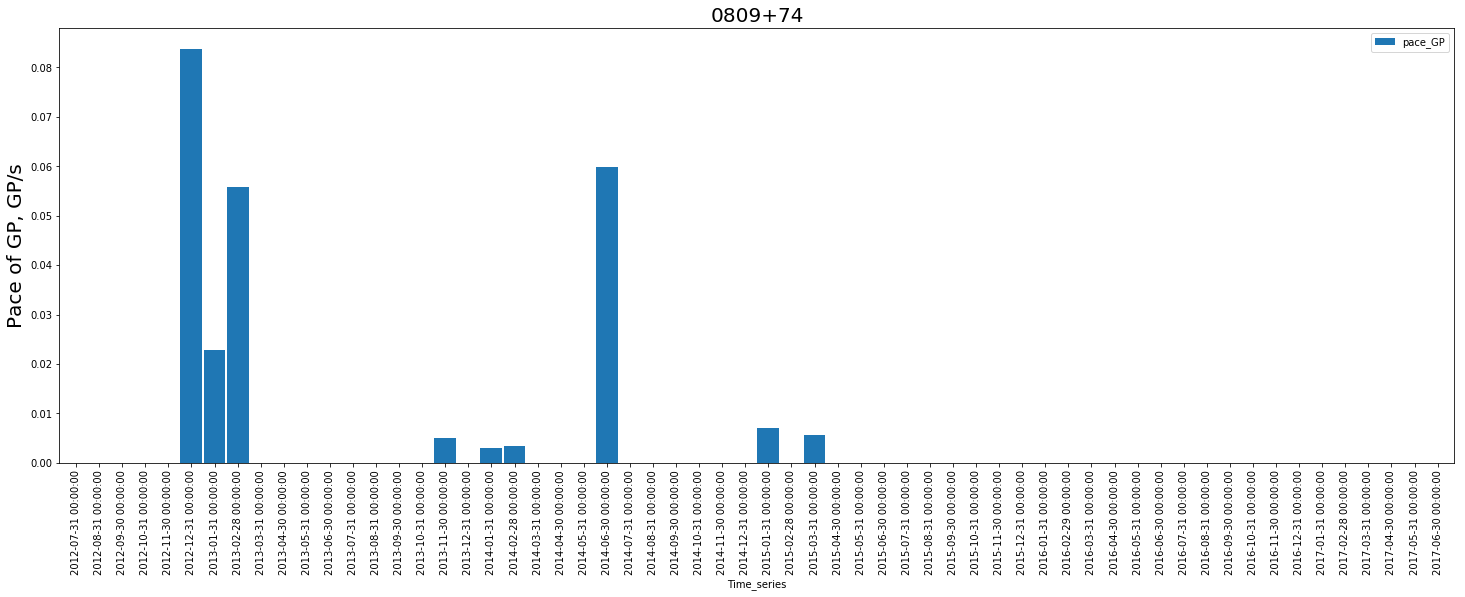

In [22]:
plt.close()
ax = result_pulsar.reset_index().plot.bar(x='Time_series', y=['pace_GP'], figsize=(25, 8), stacked=False, width=0.95)
## ax
ax.set_title(pulsar_name, fontsize = 20.0)
ax.set_ylabel('Pace of GP, GP/s', fontsize = 20.0)
path_ax = ('C:\\astrophysics\\' + 'Work\\' + 'pace_new\\' + pulsar_name + '_pace_sigma' + '.png')
plt.savefig(path_ax, format = 'png', dpi = 300, bbox_inches='tight')

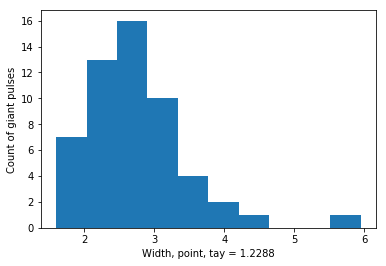

In [114]:
plt.close()
plt.hist(result_pulsar['W50, point'])
plt.xlabel('Width, point, tay = 1.2288')
plt.ylabel('Count of giant pulses')
path_g = ('C:\\astrophysics\\' + 'Work\\' + 'W_hist\\' + pulsar_name + '_W50_mean_hist' + '.png')
plt.savefig(path_g, format = 'png', dpi = 300, bbox_inches='tight')
plt.show()

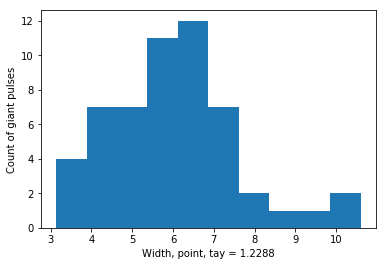

In [115]:
plt.close()
plt.hist(result_pulsar['W10, point'])
plt.xlabel('Width, point, tay = 1.2288')
plt.ylabel('Count of giant pulses')
path_gg = ('C:\\astrophysics\\' + 'Work\\' + 'W_hist\\' + pulsar_name + '_W10_mean_hist' + '.png')
plt.savefig(path_gg, format = 'png', dpi = 300, bbox_inches='tight')
plt.show()

In [116]:
len(result_pulsar['W10, point'])

76

In [117]:
max(result_pulsar['pace_GP'])


KeyError: 'pace_GP'

In [ ]:
min(result_pulsar['pace_GP'])

In [ ]:
sorted(result_pulsar['pace_GP'])

### Темпы генерации
- **0809+74** - 0,00 - 0,57
- **0950+08** - 0,25 - 11,83
- **1112+50** - 0,00 - 9,625
- **1133+16** - 0,00 - 0,938
- **1237+25** - 0,00 - 1,700

In [23]:
gp_table_pulsar.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",File name,"Count of GP, u",Num pulse,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,time_test,"Time of observation, s"
Time_series,,,,,,,,,,,,,,,,,,
2014-04-01,01.04.2014,00:25:58.9560211,2.4576,1.382474,561,454,293.556543,4.021462,010414_1237+25_00_profiles.txt,1,211,79,77.788557,1.9040,3.78000,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.643387,627.643387
2014-04-01,01.04.2014,00:25:58.9560211,2.4576,1.382474,561,454,293.556543,4.329551,010414_1237+25_00_profiles.txt,1,225,78,73.225557,2.5480,5.20800,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.643387,627.643387
2014-10-01,01.10.2014,12:26:00.5698012,1.2288,1.382428,570,153,167.404705,3.786704,011014_1237+25_00_profiles.txt,1,109,162,223.849895,2.4467,5.37705,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,211.511444,211.511444
2014-04-02,02.04.2014,00:22:03.1233456,2.4576,1.382476,561,454,250.419383,3.706409,020414_1237+25_00_profiles.txt,1,193,101,84.422917,2.1560,4.90000,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.644325,627.644325
2014-04-02,02.04.2014,00:22:03.1233456,2.4576,1.382476,561,454,250.419383,3.707758,020414_1237+25_00_profiles.txt,1,221,79,80.574817,1.9600,4.36800,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.644325,627.644325


In [24]:
gp_table_pulsar.drop(['time_test'], axis = 1)

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",File name,"Count of GP, u",Num pulse,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,"Time of observation, s"
Time_series,,,,,,,,,,,,,,,,,
2014-04-01,01.04.2014,00:25:58.9560211,2.4576,1.382474,561,454,293.556543,4.021462,010414_1237+25_00_profiles.txt,1,211,79,77.788557,1.90400,3.78000,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.643387
2014-04-01,01.04.2014,00:25:58.9560211,2.4576,1.382474,561,454,293.556543,4.329551,010414_1237+25_00_profiles.txt,1,225,78,73.225557,2.54800,5.20800,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.643387
2014-10-01,01.10.2014,12:26:00.5698012,1.2288,1.382428,570,153,167.404705,3.786704,011014_1237+25_00_profiles.txt,1,109,162,223.849895,2.44670,5.37705,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,211.511444
2014-04-02,02.04.2014,00:22:03.1233456,2.4576,1.382476,561,454,250.419383,3.706409,020414_1237+25_00_profiles.txt,1,193,101,84.422917,2.15600,4.90000,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.644325
2014-04-02,02.04.2014,00:22:03.1233456,2.4576,1.382476,561,454,250.419383,3.707758,020414_1237+25_00_profiles.txt,1,221,79,80.574817,1.96000,4.36800,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.644325
2016-09-02,02.09.2016,14:18:07.0588576,2.4576,1.382487,561,152,60.288480,0.865117,020916_1237+25_00_profiles.txt,1,90,38,81.744320,1.90400,3.55600,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,210.137949
2015-10-02,02.10.2015,12:23:05.8445437,1.2288,1.382426,570,153,235.542166,4.559940,021015_1237+25_00_profiles.txt,1,87,201,101.742734,3.12950,8.50655,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,211.511225
2014-04-03,03.04.2014,00:18:07.4190771,2.4576,1.382479,561,454,243.101315,3.427941,030414_1237+25_00_profiles.txt,1,158,79,189.723185,1.98800,3.66800,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.645257
2014-04-03,03.04.2014,00:18:07.4190771,2.4576,1.382479,561,454,243.101315,3.295017,030414_1237+25_00_profiles.txt,1,225,101,287.689285,2.32400,5.54400,C:\astrophysics\gp_plot_1237+25\01.04.2014_plo...,627.645257
